<a href="https://colab.research.google.com/github/Prerna-Karle/Advance-Quantum-Computation/blob/main/P02_Simon%E2%80%99s_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install qiskit qiskit-aer pylatexenc matplotlib

In [10]:
# Import Libraries
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [11]:
# Simon's Oracle
def simon_oracle():
    oracle = QuantumCircuit(4)

    # Copy input bits
    oracle.cx(0, 2)
    oracle.cx(1, 3)

    # Create hidden string s = 11
    oracle.cx(0, 3)

    return oracle

In [15]:
# Simon’s Algorithm Circuit
qc = QuantumCircuit(4, 2)

# Step 1: Apply Hadamard to input qubits
qc.h(0)
qc.h(1)

# Step 2: Apply oracle
oracle = simon_oracle()
qc.compose(oracle, inplace=True)

# Step 3: Apply Hadamard again
qc.h(0)
qc.h(1)

# Step 4: Measure input qubits
qc.measure(0, 0)
qc.measure(1, 1)

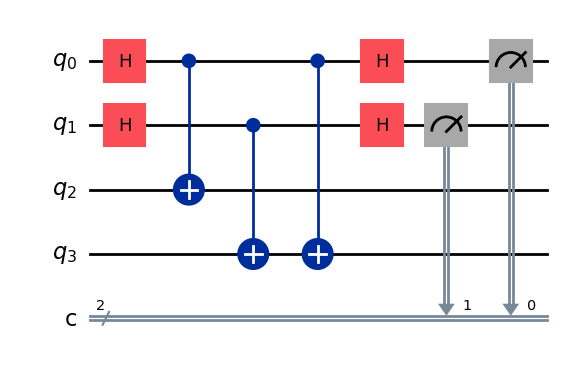

In [16]:
qc.draw('mpl')

In [17]:
# Execute the Circuit
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

counts

{'11': 268, '01': 244, '00': 235, '10': 277}

Measurement Results: {'11': 268, '01': 244, '00': 235, '10': 277}


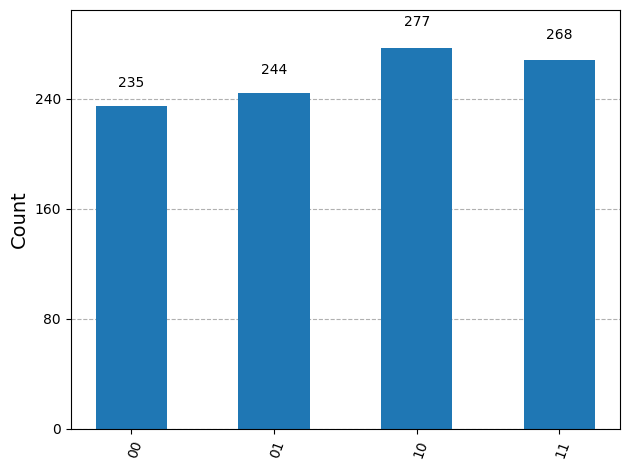

In [23]:
# Plot Output
print("Measurement Results:", counts)

fig = plot_histogram(counts)
display(fig)